# **Blob Detection**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Blob Detection** is a computer vision technique used to identify and locate regions of interest in an image that share common properties, such as color, intensity, or texture. This helps in various application such as object recognition & tracking.

---

## **Procedure for Blob Detection**

The procedure is somewhat is complex and I think it'll be better to link to a video than explain it in words. [Click here](https://youtu.be/zItstOggP7M?si=Sb72Pt6ljTkXGTPZ)

---

## **Blob Detection in OpenCV**

Before continuing, you should know that the method outlined here is different than the one presented in class. Having said that: The `SimpleBlobDectector` class in OpenCV is used for detecting and extracting blobs in an image.

First, we'll read in the image of interest as a grayscale. 

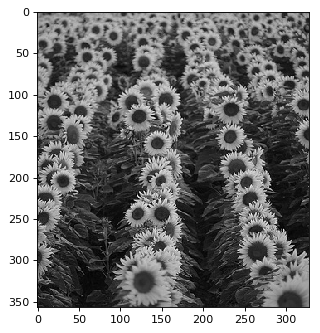

In [140]:
img = cv2.imread('data/images/sunflowers.jpg', 0)
plt.imshow(img, cmap = 'gray');

Next, we'll set the `params` variable to to configure the behaviour of the `SimpleBlobDetector`. These paramters allow you to fine tune the blob detection process based on the characteristics you are interested in. This is an optional step, but Let's go through some commonly used parameters:

- filterByArea: If set to `True`, it enables the filter based on the area of the blobs
- minArea: Specifies the minimum area (in pixels) for a blob to be considered. Blobs with an area smaller than this threshold will be ignored
- maxArea: Specifies the maximum area (in pixels) for a blob to be considered (optional). Blobs with an area larger than this threshold will be ignored
- filterByCircularity: If set to True, it enables the filter based on the circularity of the blobs
- minCircularity: Specifies the minimum circularity of a blob. Circular blobs have circularity close to 1.0, and this parameter filters out blobs with circularity below the specified threshold
- filterByColor: If set to True, it enables the filter based on the color of the blobs.
- blobColor: Specifies the color value (0 or 255) that the blobs should have. Blobs with a color different from the specified value will be ignored.

In [141]:
params = cv2.SimpleBlobDetector_Params() # creates an object to hold the parameters for blob dectection 

params.filterByArea = True
params.minArea = 20
params.maxArea = 5000

Next, we'll create an instance of the `SimpleBlobDectector` class with the optional parameters (`params`).

In [142]:
detector = cv2.SimpleBlobDetector_create(params)

Moving on, we'll now invoke the `detect` method to take in input image and return the list of `KeyPoint` objects representing the detected blobs. Each `KeyPoint` object contains information about the position, size and other characteristics of the blob. To determine how many blobs were detected, we can print out the lenght of the returned list.

In [143]:
keypoints = detector.detect(img)
# print(f"'{len(keypoints)}' Blobs Detected")

The last step is to visualize the detected blobs on the original image. The `drawKeypoints` function is used to draw the detected keypoints on a copy of the original image. 

`cv2.drawKeypoints(image = , keypoints = , outImage = None[, color = [, flags]])`

- image: The original image on which you want to draw the keypoints
- keypoints: The list of keypoints representing the detected blobs
- outImage: An optional parameter that specifies the output image where the keypoints will be drawn
- color: The color of the keypoints. It is specified as a tuple in BGR format
- flags (optional): Additional drawing options:
    - cv2.DRAW_MATCHES_FLAGS_DEFAULT: Default value. Draws keypoints without any additional information. (0)
    - cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: Draws keypoints with additional information, such as size and orientation. This can be useful for visualizing more details about each detected keypoint. (2)

In [144]:
results = cv2.drawKeypoints(img, keypoints, None, color = (0, 0, 255), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

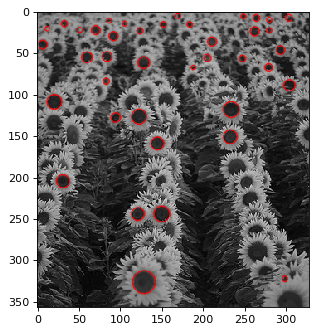

In [145]:
results = cv2.cvtColor(results, cv2.COLOR_BGR2RGB)
plt.imshow(results, cmap = 'gray');